# us-accidents-analysis

# US Accidents Exploratory Data Analysis

https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_March23.csv

TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)

+   Kaggle
+   information about accidents
+   can use useful to prevent accidents
+   mention that this does not contain data about New York
    

## Download the Data and import libraries

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
 pip install folium --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
from matplotlib import pyplot as plot

In [8]:
import seaborn as sns
sns.set_style("darkgrid")

In [9]:
import folium

In [10]:
data_filename = 'US_Accidents_March23.csv'

In [11]:
df = pd.read_csv(data_filename)

## Data preparation and cleaning

In [12]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [14]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32','float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

Percentage of missing values per column

In [16]:
missing_percentages = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [17]:
type(missing_percentages)

pandas.core.series.Series

In [18]:
missing_percentages[missing_percentages != 0]

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

<Axes: >

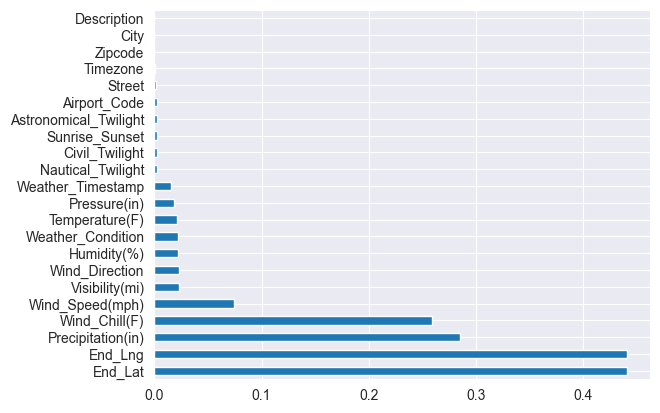

In [19]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Too many missing values of End Latitude and End Longitude

Remove columns that you don't want to use

In [20]:
df.drop(['End_Lng','End_Lat'],axis=1, inplace=True)

## Exploratory Analysis and Visualisation

Columns we will analyze.
1. City
2. State
3. Start Time
4. Start Lat, Start Lng
5. Weather Condition

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [22]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [23]:
cities = df.City.unique()
len(cities)

13679

In [24]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [25]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

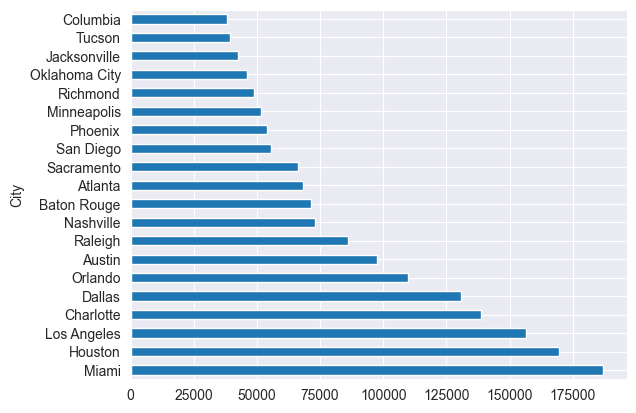

In [26]:
cities_by_accident[:20].plot(kind = 'barh')

<Axes: xlabel='count', ylabel='Count'>

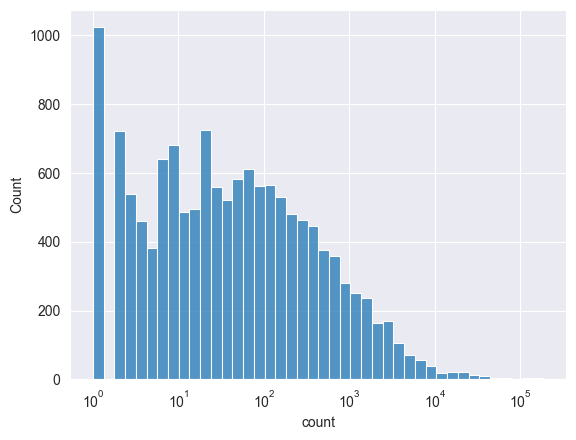

In [27]:
sns.histplot(cities_by_accident, log_scale=True)

In [28]:
cities_by_accident[cities_by_accident ==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

### State

In [29]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object

In [30]:
state_by_accident = df.State.value_counts()
state_by_accident

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [31]:
pop_df = pd.read_csv('uscities.csv')

In [32]:
pop_df

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30839,Ironville,Ironville,PA,Pennsylvania,42013,Blair,40.6586,-78.2155,0,59.2,shape,False,False,America/New_York,3,16686,1840152922
30840,Newkirk,Newkirk,NM,New Mexico,35019,Guadalupe,35.0635,-104.2715,0,0.0,shape,False,False,America/Denver,3,88417,1840024978
30841,Falcon Village,Falcon Village,TX,Texas,48427,Starr,26.5652,-99.1341,0,38.9,shape,False,False,America/Chicago,3,78545,1840018314
30842,Hidden Lakes,Hidden Lakes,OH,Ohio,39117,Morrow,40.5479,-82.7632,0,18.6,shape,False,False,America/New_York,3,43338,1840153068


In [33]:
type(pop_df)

pandas.core.frame.DataFrame

### Start Time

In [34]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [35]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [36]:
df.Start_Time = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [37]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [38]:
df.Start_Time.dt.hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
7728389    18.0
7728390    19.0
7728391    19.0
7728392    19.0
7728393    18.0
Name: Start_Time, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Time', ylabel='Density'>

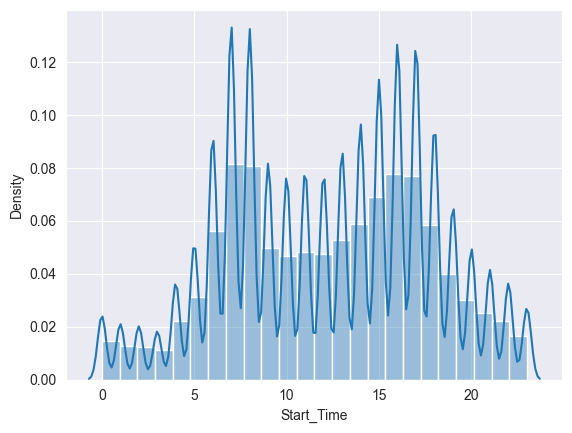

In [39]:
sns.histplot(data=df.Start_Time.dt.hour, bins=24, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

- A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work).
- Next highest percentage are in between 3 pm to 6 pm (rush hour).

<Axes: xlabel='Start_Time', ylabel='Density'>

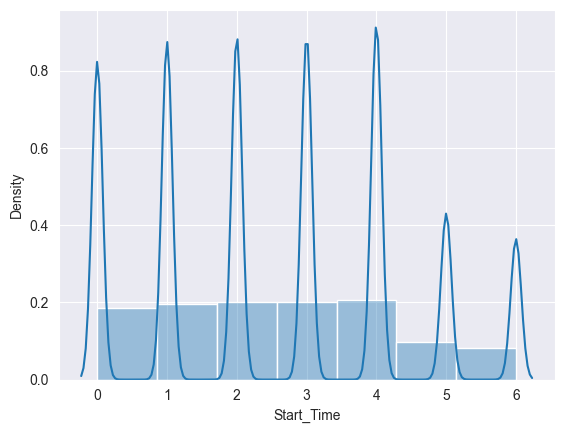

In [40]:
sns.histplot(data=df.Start_Time.dt.dayofweek, bins=7, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})

Is the distribution of accidents by hour the same on weekends as on weekdays.

<Axes: xlabel='Start_Time', ylabel='Count'>

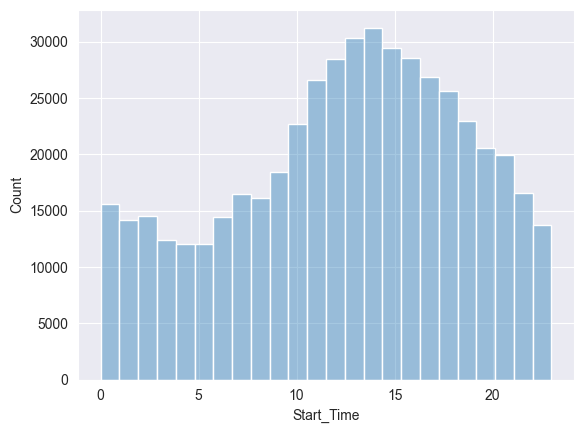

In [41]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(data=sundays_start_time.dt.hour, bins=24, alpha=0.4, kde=False, kde_kws={"cut": 3})

<Axes: xlabel='Start_Time', ylabel='Count'>

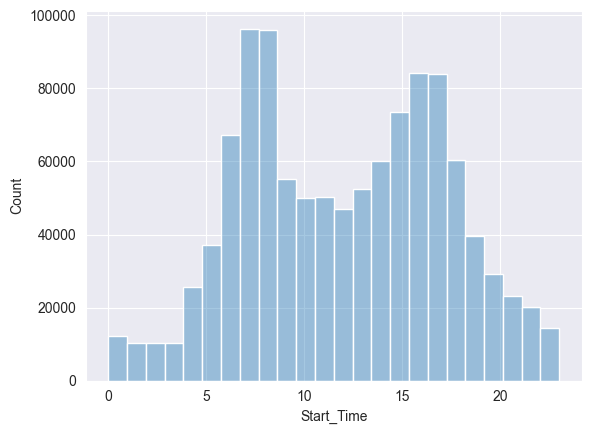

In [42]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(data=mondays_start_time.dt.hour, bins=24, alpha=0.4, kde=False, kde_kws={"cut": 3})

On Sundays, the peak occurs between 11 am and 5 pm, unlike weekdays

<Axes: xlabel='Start_Time', ylabel='Density'>

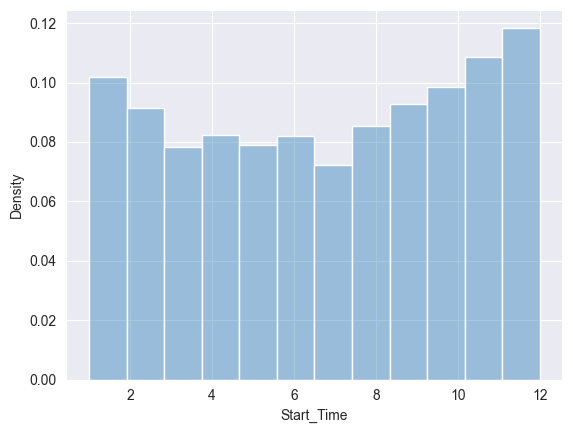

In [43]:
sns.histplot(data=df.Start_Time.dt.month, bins=12, stat="density", alpha=0.4, kde=False, kde_kws={"cut": 3})

The season with the highest number of car accidents is from end of summer to start of winter.

<Axes: xlabel='Start_Time', ylabel='Density'>

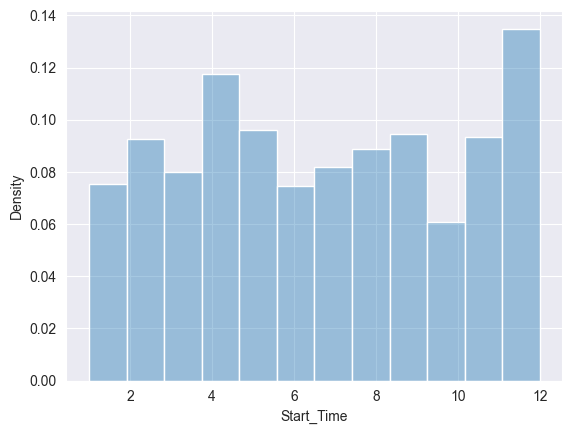

In [44]:
df_2022 = df[df.Start_Time.dt.year == 2022]
df_2022_S1 = df_2022[df_2022.Source == 'Source1']
sns.histplot(df_2022_S1.Start_Time.dt.month, bins=12, stat="density", alpha=0.4, kde=False, kde_kws={"cut": 3})

<Axes: xlabel='Start_Time', ylabel='Density'>

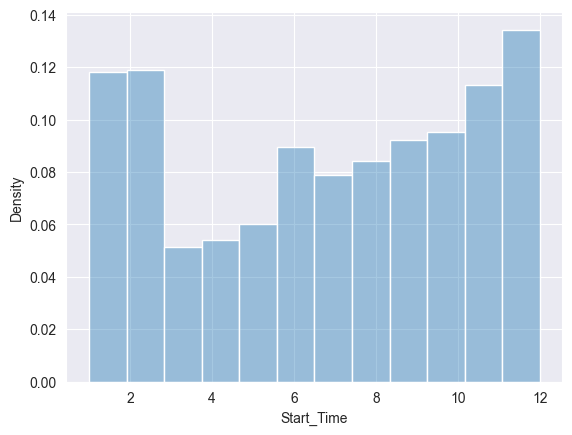

In [45]:
df_2021 = df[df.Start_Time.dt.year == 2021]
df_2021_S1 = df_2021[df_2021.Source == 'Source1']
sns.histplot(df_2021_S1.Start_Time.dt.month, bins=12, stat="density", alpha=0.4, kde=False, kde_kws={"cut": 3})

Source2 have quite a missing data issue

<Axes: ylabel='count'>

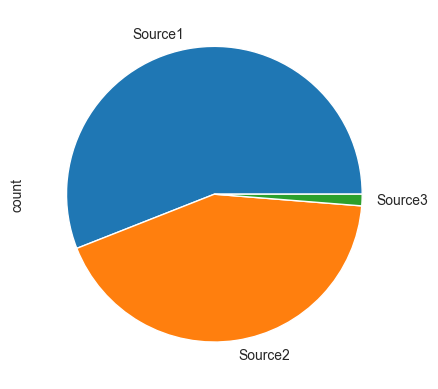

In [46]:
df.Source.value_counts().plot(kind='pie')

-   Consider excluding Source2 data,seems to have issues.

### Start Latitude & Longitude

In [47]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [48]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [49]:
sample_df = df.sample(int(0.1 * len(df)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

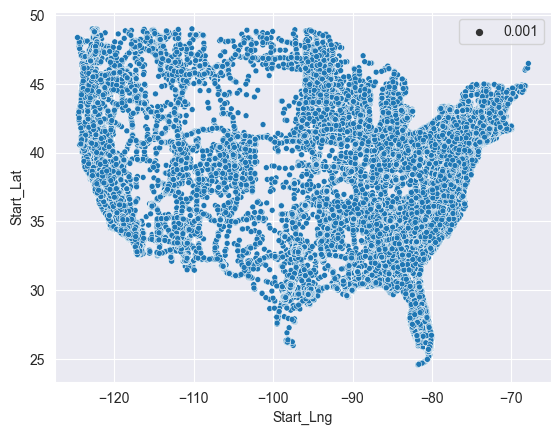

In [50]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [51]:
lat, lon = df.Start_Lat[0],df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [52]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x)

('Start_Lat', 80868      34.074913
7236905    33.822103
4791013    29.478330
3246406    44.563938
5211955    38.888439
             ...    
3638696    43.187804
3726800    40.708700
2720321    42.226952
440838     33.847610
1181637    37.731380
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 80868     -118.273315
7236905   -118.196305
4791013    -82.282304
3246406   -123.238800
5211955   -121.093074
              ...    
3638696   -115.784500
3726800    -74.177733
2720321    -71.020424
440838    -117.817993
1181637   -122.187080
Name: Start_Lng, Length: 100, dtype: float64)


In [53]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [54]:
from folium.plugins import HeatMap

In [55]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [56]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Weather Condition

In [57]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [58]:
df.Weather_Condition

0             Light Rain
1             Light Rain
2               Overcast
3          Mostly Cloudy
4          Mostly Cloudy
               ...      
7728389             Fair
7728390             Fair
7728391    Partly Cloudy
7728392             Fair
7728393             Fair
Name: Weather_Condition, Length: 7728394, dtype: object

In [59]:
Weather=df.Weather_Condition.unique()
len(Weather)

145

In [60]:
weather_by_accidents = df.Weather_Condition.value_counts()

In [61]:
weather_by_accidents

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

<Axes: ylabel='Weather_Condition'>

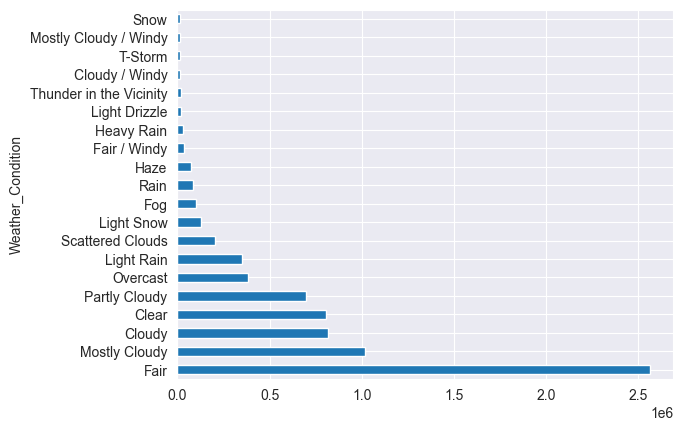

In [62]:
weather_by_accidents[:20].plot(kind = 'barh')

Most accidents took place when weather was normal, showing people not being serious at calm weather

<Axes: xlabel='count', ylabel='Count'>

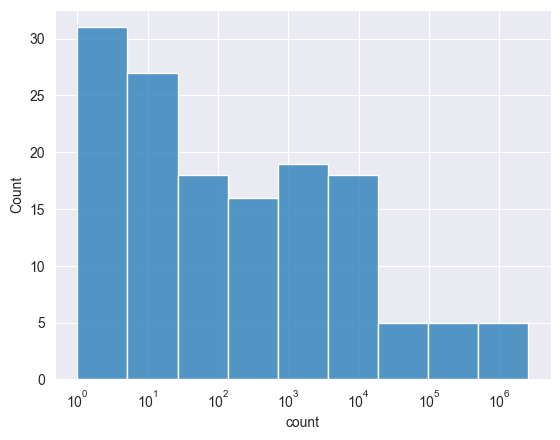

In [63]:
sns.histplot(weather_by_accidents, log_scale=True)

## Ask & answer questions

*1. Are there more accidents in warmer or colder areas?*

    Most accidents are taking place towards end of summer and start of winter
 
2. Which 5 states have the highest number of accidents? How about per capita?


*3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.*

    No, New York is not shown in data strangely.
    
*4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.*

    Major number of accidents takes place in Miami, Houstan, Los Angels, Charlotte and Dallas.
    
*5. What time of the day are accidents most frequent in?*

    A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work).And next peak time are in between 3 pm to 6 pm (rush hour).
    
*6. Which days of the week have the most accidents?*

    All the working days had equally likely more accidents than weekends.
    
*7. Which months have the most accidents?*

    The peak accidents can be seen in month of November to January.

*8. What is the trend of accidents year over year (decreasing/increasing)?*

    Overall analysis over year shows the trend of accidents is increasing with increase in technology and fast paced lifestyle

## Summary and Conclusion


Insights:
-   No data from New York
-   Less than 9% of cities have more than 1000 yearly accidents.
-   Nearly 1000 cities reported with only one accident( worth need investigating)
-   Miami has highest number accident report.
-   Greater accidents during work days.
-   Most accidents take place during reporting time to an organisation.
-   Accidents are more common in starting winter.
-   Accident trend is incresing.

Conclusion:
-   With emerging new speed vehicles, even after lots of improvement in technologies related to reducing traffic the trend continues to grow. Hence, not just advancement in traffic but public seriousness towards driving is need to be taken cared of to reduce number of accidents yaking place.